In [1]:
%matplotlib inline


Decoding with SpaceNet: face vs house object recognition
=========================================================

Here is a simple example of decoding with a SpaceNet prior (i.e Graph-Net,
TV-l1, etc.), reproducing the Haxby 2001 study on a face vs house
discrimination task.

See also the SpaceNet documentation: `space_net`.



Load the Haxby dataset
------------------------



In [2]:
from nilearn.datasets import fetch_haxby
data_files = fetch_haxby()

# Load behavioral data
import pandas as pd
behavioral = pd.read_csv(data_files.session_target[0], sep=" ")

# Restrict to face and house conditions
conditions = behavioral['labels']
condition_mask = conditions.isin(['face', 'house'])

# Split data into train and test samples, using the chunks
condition_mask_train = (condition_mask) & (behavioral['chunks'] <= 6)
condition_mask_test = (condition_mask) & (behavioral['chunks'] > 6)

# Apply this sample mask to X (fMRI data) and y (behavioral labels)
# Because the data is in one single large 4D image, we need to use
# index_img to do the split easily
from nilearn.image import index_img
func_filenames = data_files.func[0]
X_train = index_img(func_filenames, condition_mask_train)
X_test = index_img(func_filenames, condition_mask_test)
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]

# Compute the mean epi to be used for the background of the plotting
from nilearn.image import mean_img
background_img = mean_img(func_filenames)

Fit SpaceNet with a Graph-Net penalty
--------------------------------------



In [3]:
from nilearn.decoding import SpaceNetClassifier

# Fit model on train data and predict on test data
decoder = SpaceNetClassifier(memory="nilearn_cache", penalty='graph-net')
decoder.fit(X_train, y_train)
y_pred = decoder.predict(X_test)
accuracy = (y_pred == y_test).mean() * 100.
print("Graph-net classification accuracy : %g%%" % accuracy)

[NiftiMasker.fit] Loading data from Nifti1Image(
shape=(40, 64, 64, 126),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [
[NiftiMasker.fit] Computing the mask


/home/varoquau/dev/nilearn/nilearn/_utils/cache_mixin.py:291: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "
/home/varoquau/dev/nilearn/nilearn/_utils/cache_mixin.py:118: UserWarning: Incompatible cache in nilearn_cache/joblib: different version of nibabel. Deleting the cache. Put nilearn.CHECK_CACHE_VERSION to false to avoid this behavior.
  % cachedir)


[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 126),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


/home/varoquau/dev/nilearn/nilearn/decoding/space_net.py:835: UserWarning: Brain mask is bigger than the volume of a standard human brain. This object is probably not tuned to be used on such data.
  self.screening_percentile, self.mask_img_, verbose=self.verbose)
.........[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s
....................................................../home/varoquau/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/varoquau/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid va

Time Elapsed: 115.338 seconds, 1 minutes.
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 90),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [ 
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
Graph-net classification accuracy : 77.7778%


Visualization of Graph-net weights
------------------------------------



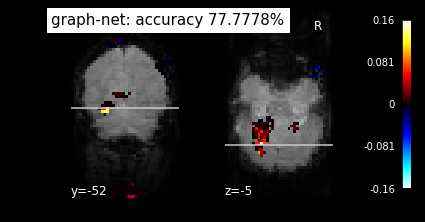

In [4]:
from nilearn.plotting import plot_stat_map, show
coef_img = decoder.coef_img_
plot_stat_map(coef_img, background_img,
              title="graph-net: accuracy %g%%" % accuracy,
              cut_coords=(-52, -5), display_mode="yz")

# Save the coefficients to a nifti file
coef_img.to_filename('haxby_graph-net_weights.nii')

Now Fit SpaceNet with a TV-l1 penalty
--------------------------------------



In [5]:
decoder = SpaceNetClassifier(memory="nilearn_cache", penalty='tv-l1')
decoder.fit(X_train, y_train)
y_pred = decoder.predict(X_test)
accuracy = (y_pred == y_test).mean() * 100.
print("TV-l1 classification accuracy : %g%%" % accuracy)

[NiftiMasker.fit] Loading data from Nifti1Image(
shape=(40, 64, 64, 126),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [
[NiftiMasker.fit] Computing the mask
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 126),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


.........[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.7min remaining:    0.0s
..................................................................[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 15.4min finished


Time Elapsed: 927.991 seconds, 15 minutes.
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(40, 64, 64, 90),
affine=array([[  -3.5  ,    0.   ,    0.   ,   68.25 ],
       [   0.   ,    3.75 ,    0.   , -118.125],
       [   0.   ,    0.   ,    3.75 , -118.125],
       [ 
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals
TV-l1 classification accuracy : 76.6667%


Visualization of TV-L1 weights
-------------------------------



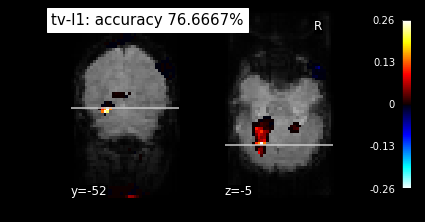

In [6]:
coef_img = decoder.coef_img_
plot_stat_map(coef_img, background_img,
              title="tv-l1: accuracy %g%%" % accuracy,
              cut_coords=(-52, -5), display_mode="yz")

# Save the coefficients to a nifti file
coef_img.to_filename('haxby_tv-l1_weights.nii')
show()

We can see that the TV-l1 penalty is 3 times slower to converge and
gives the same prediction accuracy. However, it yields much
cleaner coefficient maps

